# Laura Dooley
### 7/4/2024

## Purpose:
### To build models to perdict a car's miles per gallon using the data set autompg-dataset on kraggle.   
   

## Head of Auto-mpg dataset 

In [57]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

autompg_df = pd.read_csv("auto-mpg.csv")

# Print the head of the dataset
print(autompg_df.head())

autompg_df.info() 

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

## Dataset Distrubtion 

AttributeError: module 'matplotlib' has no attribute 'tight_layout'

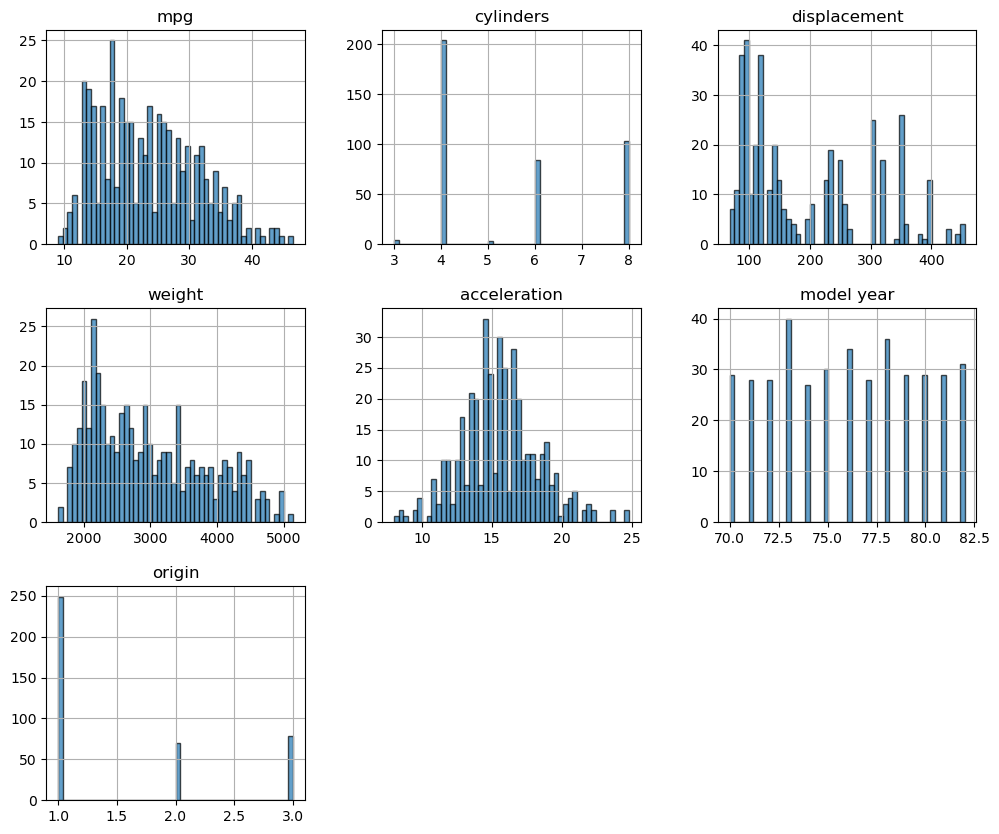

In [58]:
# Displaying graphs for all numeric columns resize to be able to read easier
autompg_df.hist(bins=50, edgecolor='black', alpha=0.7, figsize=(12, 10))

# Adjust layout for better spacing
plt.tight_layout()

# Show plots
plt.show()

## Distribution Summary
|Feature|Distribution|
|:---|:---|
|MPG| Slightly skewd to the right indicating that most in this dataset have higher fuel efficiency|
|Cylinder| Multimodial with distinct peaks indicating that cars are either 4, 6, or 8 cylinders|
|Displacement| Skewd to the right with the majority of the cars having lower engine displacement while there are small numver a cars with the larger engine displacement|
|Horsepower| skewd right with most of the cars having lower horsepower|
|Weight| Skewd right indicating most cars are on the lightside|
|Acceleration| Normal distribution indicating most cars have moderate acceleration|
|Model Year| Uniform |
|Origin| Distinct peaks indicating that most cars came from USA in the dataset|




The two features used to predict miles per gallon are displacement and weight. From the graphs below both features have a negative correlation with miles per gallon and they are a strong correlation with each other. 


ChatGPT, developed by OpenAI, is a conversational AI model. For more information, visit [OpenAI’s ChatGPT page](https://www.openai.com/chatgpt).


              displacement    weight       mpg
displacement      1.000000  0.932824 -0.804203
weight            0.932824  1.000000 -0.831741
mpg              -0.804203 -0.831741  1.000000


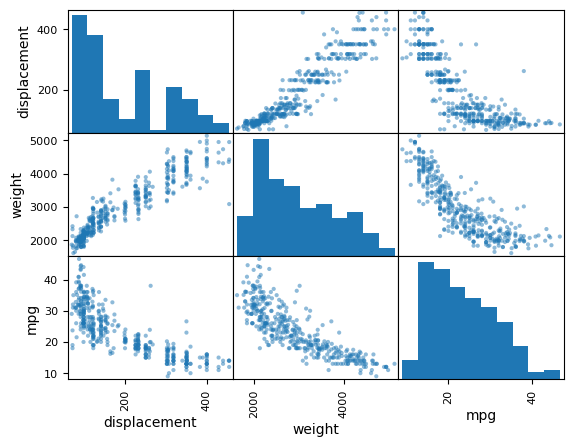

In [ ]:
from pandas.plotting import scatter_matrix


# scatter plots and histograms

attributes = ['displacement', 'weight', 'mpg']

scatter_matrix(autompg_df[attributes])

correlation_matrix = autompg_df[attributes].corr()
print(correlation_matrix)



## New Feature.
By adding the new feature engine efficiency will provide a better understanding of engine performance and fuel consumption which will potentially lead to closer mpg predictions. This feature will incorporate a more detailed aspect of engine performance. 

In [ ]:


# Convert 'horsepower' to numeric, forcing errors to NaN
autompg_df['horsepower'] = pd.to_numeric(autompg_df['horsepower'], errors='coerce')

# Drop rows with NaN values in 'horsepower' (if any)
autompg_df.dropna(subset=['horsepower'], inplace=True)

# Convert 'horsepower' to integer
autompg_df['horsepower'] = autompg_df['horsepower'].astype(int)

# Create the 'engine_efficiency' feature
autompg_df['engine_efficiency'] = autompg_df['displacement'] / autompg_df['horsepower']

# Display the updated DataFrame with the new feature
print(autompg_df[['displacement', 'horsepower', 'engine_efficiency', 'mpg']].head())

# Verify the data types
print("\nData types after conversion:\n", autompg_df.dtypes)


   displacement  horsepower  engine_efficiency   mpg
0         307.0         130           2.361538  18.0
1         350.0         165           2.121212  15.0
2         318.0         150           2.120000  18.0
3         304.0         150           2.026667  16.0
4         302.0         140           2.157143  17.0

Data types after conversion:
 mpg                  float64
cylinders              int64
displacement         float64
horsepower             int32
weight                 int64
acceleration         float64
model year             int64
origin                 int64
car name              object
engine_efficiency    float64
dtype: object


##  Scikit learn regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


train_set, test_set = train_test_split(autompg_df, test_size=0.4)

print('Train size: ', len(train_set), 'Test size: ', len(test_set))

X = train_set[['engine_efficiency', 'weight']]
y = train_set[['mpg']]

X_test = test_set[['engine_efficiency', 'weight']]
y_test = test_set[['mpg']]

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training  data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X, y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


# Calculate standard deviations
engine_efficiency_std = autompg_df['engine_efficiency'].std()
weight_std = autompg_df['weight'].std()

# Standardize coefficients
engine_efficiency_coef = -0.25773214 * engine_efficiency_std
weight_coef = -0.0078804 * weight_std

print("Standardized coefficient for engine_efficiency:", engine_efficiency_coef)
print("Standardized coefficient for weight:", weight_coef)

Train size:  235 Test size:  157
Results for linear regression on training  data
 Default settings
Internal parameters:
 Bias is  [48.70931588]
 Coefficients [[-0.90670776 -0.00789503]]
 Score 0.7097086172137158
MAE is  3.3223284107587747
RMSE is  4.320443242988988
MSE is  18.666229815889203
R^2 0.7097086172137158

Results for linear regression on test data
MAE is  3.402322870104672
RMSE is  4.431022356262155
MSE is  19.63395912169502
R^2  0.6196137218282218
Standardized coefficient for engine_efficiency: -0.13028563303871396
Standardized coefficient for weight: -6.6936319341624575




The relative importance of engine efficiency and weight has a negative effect on miles per gallon. As either of these features increase the miles per gallon decrease. When taking the scale into account, the weight of the car has a greater effect on miles per gallon and should be more of the focus than engine efficiency to improve it.  

## Pipeline 1 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
poly4 = PolynomialFeatures(degree=4, include_bias=False)
scale = StandardScaler()
lr_model = LinearRegression()

stages = [('imp_mean', imp_mean),
('poly4', poly4),
('scale', scale),
('lr_model', lr_model),
]
pipe_model = Pipeline(stages)

pipe_model.fit(X,y)
y_pred = pipe_model.predict(X)
print('Results for pipeline linear regression on training data')
#print(' Default settings')
#print('Internal parameters:')
print(' Bias is ', pipe_model.predict([[0,0]]))
#print(' Coefficients', pipe_model.coef_)
print(' Score', pipe_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2', r2_score(y,y_pred))
      
y_test_pred = pipe_model.predict(X_test)

print()
print('Results for pipeline linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))



Results for pipeline linear regression on training data
 Bias is  [[-61.20112579]]
 Score 0.7802710279184015
MAE is  2.6910531156511523
RMSE is  3.758849126056533
MSE is  14.12894675245596
R^2 0.7802710279184015

Results for pipeline linear regression on test data
MAE is  3.032899013619926
RMSE is  4.445059648611086
MSE is  19.758555279710517
R^2  0.6171998088457075


c:\Users\laura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Pipeline 2 

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Define the stages of the pipeline
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
poly3 = PolynomialFeatures(degree=3, include_bias=False)
scale = StandardScaler()
lr_model = LinearRegression()

stages = [
    ('imp_median', imp_median),
    ('poly3', poly3),
    ('scale', scale),
    ('lr_model', lr_model)
]

# Create the pipeline
pipe_model = Pipeline(stages)

# Fit the model
pipe_model.fit(X_train, y_train)

# Predictions
y_train_pred = pipe_model.predict(X_train)
y_test_pred = pipe_model.predict(X_test)

# Print results
print('Results for pipeline linear regression on training data')
print('Bias (intercept) is', pipe_model.named_steps['lr_model'].intercept_)
print('Coefficients are', pipe_model.named_steps['lr_model'].coef_)
print('Score is', pipe_model.score(X_train, y_train))
print('MAE is', mean_absolute_error(y_train, y_train_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R^2 is', r2_score(y_train, y_train_pred))

print()
print('Results for pipeline linear regression on test data')
print('MAE is', mean_absolute_error(y_test, y_test_pred))
print('RMSE is', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2 is', r2_score(y_test, y_test_pred))

Results for pipeline linear regression on training data
Bias (intercept) is [25.09858156]
Coefficients are [[ 46.28932852   1.26144024 -70.37557726 -29.09069145  -9.10649096
    4.69922127  65.90103031 -32.45539493  17.41811798]]
Score is 0.7658036893430243
MAE is 2.7298009292631598
RMSE is 3.6786808562220967
R^2 is 0.7658036893430243

Results for pipeline linear regression on test data
MAE is 3.1025928347469187
RMSE is 4.127354628426811
R^2 is 0.7652079768868836


# Results 
Basic results for the regression model to predict wight on the Auto_mpg data.

|Model|Training Feature| Set | RMSE| R2|
|:---|:---|:---|:---|:---|
|Linear Regression| Engine Efficiency, weight| Training|4.49|69.57|
|Linear Regression| Engine Efficiency, weight| Test|4.10|67.92|
|Pipeline 1| Engine Efficiency, weight| Training|3.76 |78.02|
|Pipeline 1| Engine Efficiency, weight| Test|4.45 |61.72|
|Pipeline 2| Engine Efficiency, weight| Training|3.68 |76.58|
|Pipeline 2| Engine Efficiency, weight| Test|34.13|75.52|